In [179]:
import os, json, sys

sys.path.append(os.path.join('..','Assets','python'))

import numpy               as np
import matplotlib.pyplot   as plt
import matplotlib.patches  as patch
import matplotlib          as mpl
import pandas              as pd
from matplotlib            import cm
from matplotlib.colors     import LinearSegmentedColormap
from global_data           import run_years

In [69]:
def load_infection_data_from_path(expname):
    tpath = os.path.join('..',expname)
    with open(os.path.join(tpath,'data_brick.json')) as fid01:
        data_brick = json.load(fid01)

    with open(os.path.join(tpath,'param_dict.json')) as fid01:
        param_dict = json.load(fid01)

    mydf = process_outputs(data_brick, param_dict)
    return mydf
    
def process_outputs(data_brick, param_dict):
    processed_dict = preprocess_dict(param_dict['EXP_VARIABLE'])
    df = pd.DataFrame().from_dict(processed_dict)
    
    
    nsims = int(param_dict['NUM_SIMS'])
    ref_year = param_dict['EXP_CONSTANT']['start_year']
    df['timeseries'] = None
    df['age_hists']  = None
    df['pop_data']  = None
    for key in data_brick.keys():
        df.at[df.index[df['run_number']==int(key)][0], 'timeseries'] = np.array(data_brick[key]['timeseries'])
        df.at[df.index[df['run_number']==int(key)][0], 'age_hists'] = np.array(data_brick[key]['age_data'])
        df.at[df.index[df['run_number']==int(key)][0], 'pop_data'] = np.array(data_brick[key]['pyr_data'])
    return df

def preprocess_dict(d):
    allkeys = ['run_number','R0', 'MCV1', 'MCV1_age', 'mat_factor_inf', 'mat_factor_vx', 'mat_duration', 'MCV2', 'MCV2_age']
    defaults = {'run_number':0,
                'R0' :16.0, 
                'MCV1': 0.0, 
                'MCV1_age': 270.0, 
                'mat_factor_inf': 1.0, 
                'mat_factor_vx': 0.4, 
                'mat_duration': 120.0,
                'MCV2': 0.0, 
                'MCV2_age': 1.25*365.0}
    # Ensure all keys are present in the dictionary, fill with default if not
    return {key: d.get(key, [defaults[key]] * len(next(iter(d.values())))) for key in allkeys}


In [160]:
df = load_infection_data_from_path('experiment_sweepAAV')
df = pd.concat([df, load_infection_data_from_path('experiment_sweepAAV_MCV2')], ignore_index=True)
#df = pd.concat([df, load_infection_data_from_path('experiment_sweepAAV_longmAbs')], ignore_index=True)

In [143]:
df

,run_number,R0,MCV1,MCV1_age,mat_factor_inf,mat_factor_vx,mat_duration,MCV2,MCV2_age,timeseries,age_hists,pop_data
0,0,6.0,0.0,90.0,1.0,0.4,120.0,0.0,456.25,"[5.0, 5.0, 9.0, 10.0, 10.0, 24.0, 28.0, 59.0, ...","[[0.0, 0.0, 1.0, 0.0, 5.0, 3.0, 6.0, 4.0, 2.0,...","[[67352.0, 58305.0, 53886.0, 48984.0, 45322.0,..."
1,1,6.0,0.0,90.0,1.0,0.4,120.0,0.0,456.25,"[3.0, 11.0, 20.0, 36.0, 50.0, 65.0, 121.0, 248...","[[2.0, 9.0, 17.0, 12.0, 27.0, 41.0, 27.0, 48.0...","[[65480.0, 60828.0, 55708.0, 42608.0, 42794.0,..."
2,2,6.0,0.0,90.0,1.0,0.4,120.0,0.0,456.25,"[0.0, 8.0, 31.0, 63.0, 90.0, 172.0, 238.0, 320...","[[2.0, 5.0, 6.0, 14.0, 24.0, 26.0, 47.0, 55.0,...","[[64933.0, 57407.0, 57617.0, 51625.0, 45676.0,..."
3,3,6.0,0.0,90.0,1.0,0.4,120.0,0.0,456.25,"[13.0, 5.0, 21.0, 35.0, 65.0, 74.0, 68.0, 137....","[[1.0, 1.0, 9.0, 7.0, 10.0, 14.0, 13.0, 23.0, ...","[[68008.0, 63170.0, 53182.0, 51885.0, 40033.0,..."
4,4,6.0,0.0,90.0,1.0,0.4,120.0,0.0,456.25,"[12.0, 37.0, 77.0, 124.0, 189.0, 248.0, 377.0,...","[[3.0, 6.0, 26.0, 25.0, 48.0, 52.0, 74.0, 82.0...","[[66104.0, 60045.0, 53501.0, 48960.0, 43530.0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6235,2140,16.0,1.0,457.0,1.0,0.4,180.0,0.0,456.25,"[2.0, 15.0, 38.0, 40.0, 75.0, 76.0, 124.0, 219...","[[3.0, 7.0, 10.0, 26.0, 39.0, 52.0, 76.0, 100....","[[69508.0, 58320.0, 54487.0, 50119.0, 44901.0,..."
6236,2141,16.0,1.0,457.0,1.0,0.4,180.0,0.0,456.25,"[9.0, 6.0, 4.0, 5.0, 9.0, 12.0, 18.0, 50.0, 73...","[[0.0, 1.0, 2.0, 2.0, 7.0, 6.0, 15.0, 14.0, 10...","[[64111.0, 60560.0, 51024.0, 49112.0, 45500.0,..."
6237,2142,16.0,1.0,457.0,1.0,0.4,180.0,0.0,456.25,"[4.0, 9.0, 27.0, 27.0, 52.0, 44.0, 71.0, 99.0,...","[[1.0, 3.0, 4.0, 19.0, 25.0, 43.0, 31.0, 50.0,...","[[66381.0, 54284.0, 48408.0, 48424.0, 46302.0,..."
6238,2143,16.0,1.0,457.0,1.0,0.4,180.0,0.0,456.25,"[7.0, 17.0, 44.0, 102.0, 137.0, 241.0, 270.0, ...","[[1.0, 7.0, 16.0, 19.0, 50.0, 69.0, 92.0, 113....","[[65127.0, 63710.0, 51909.0, 45721.0, 42002.0,..."


In [161]:
df['tpop_avg'] = df['pop_data'].apply(lambda x: np.sum(x, axis=1))
df['tpop_xval']   = df['tpop_avg'].apply(lambda x: np.arange(len(x)))
xval        = np.arange(0,run_years,1/12) + 1/24
df['pops'] = df.apply(lambda row: np.interp(xval, row['tpop_xval'], row['tpop_avg']), axis=1)
df['Inf_mean'] = df['timeseries'].apply(lambda x: x[120:].mean())
df['Inf_mean_nrm'] = df.apply(lambda row: np.mean((1e5*row['timeseries']/row['pops'])[120:]), axis=1)

In [162]:
allkeys = ['R0', 'MCV1', 'MCV1_age', 'mat_factor_inf', 'mat_factor_vx', 'mat_duration', 'MCV2', 'MCV2_age']
grouped_df = df.groupby(allkeys)['Inf_mean_nrm'].mean().reset_index()


In [82]:
#fidx = (pyr_mat[:,0,0]>=0)
#pyr_mat_avg = np.mean(pyr_mat[fidx,:,:],axis=0)
#tpop_avg    = np.sum(pyr_mat_avg, axis=1)
#tpop_xval   = np.arange(len(tpop_avg))#

#xval        = np.arange(0,run_years,1/12) + 1/24
#pops        = np.interp(xval, tpop_xval, tpop_avg)
#inf_dat_nrm = inf_dat[fidx,:]/pops*1e5

#inf_dat_mean = np.mean(inf_dat_nrm[:, 40:], axis=1)

In [109]:
df['Inf_mean'][0].shape

()

In [83]:
#df['Infs'] = inf_dat_mean

In [84]:
print(grouped_df)

       R0  MCV1  MCV1_age  mat_factor_inf  mat_factor_vx  mat_duration  MCV2  \
0     6.0   0.0      90.0             1.0            0.4         120.0   0.0   
1     6.0   0.0     121.0             1.0            0.4         120.0   0.0   
2     6.0   0.0     151.0             1.0            0.4         120.0   0.0   
3     6.0   0.0     182.0             1.0            0.4         120.0   0.0   
4     6.0   0.0     212.0             1.0            0.4         120.0   0.0   
..    ...   ...       ...             ...            ...           ...   ...   
814  24.0   1.0     334.0             1.0            0.4         120.0   0.0   
815  24.0   1.0     365.0             1.0            0.4         120.0   0.0   
816  24.0   1.0     396.0             1.0            0.4         120.0   0.0   
817  24.0   1.0     426.0             1.0            0.4         120.0   0.0   
818  24.0   1.0     457.0             1.0            0.4         120.0   0.0   

     MCV2_age     Inf_mean  
0      456

/var/folders/1b/yq6gx3hj51jf_v98kwv057xh0000gn/T/ipykernel_38591/1817067702.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  mycmap = cm.get_cmap('Blues', 10+len(unique_MCV1_values))


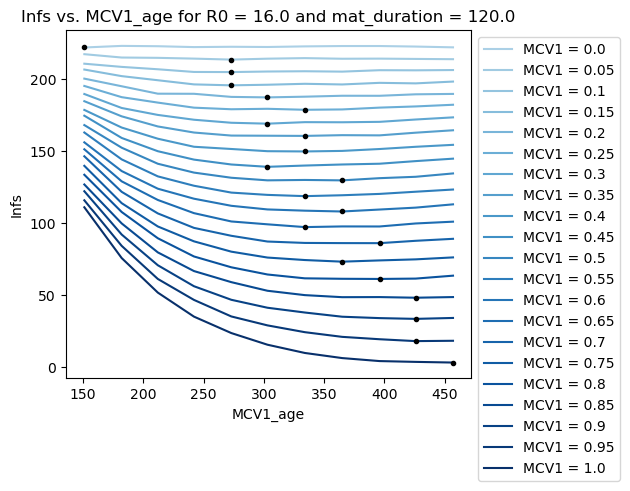

Bad pipe message: %s [b' e\xa7\xddC6.\xe2\x18\xb5=\xd02-\xda\xf7B&\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E\x00F\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\x96\x00\x97\x00\x98\x00\x99\x00\x9a\x00\x9b\x00\x9c\x00\x9d\x00\x9e\x00\x9f\x00\xa0\x00\xa1\x00\xa2\x00\xa3\x00\xa4\x00\xa5\x00\xa6\x00\xa7\x00\xba\x00\xbb\x00\xbc\x00\xbd\x00\xbe\x00\xbf\x00\xc0\x00\xc1\x00\xc2\x00\xc3\x00\xc4\x00\xc5\x13\x01\x13\x02\x13\x03\x13\x04\x13\x05\xc0\x01\xc0\x02\xc0\x03\xc0\x04\xc0\x05\xc0\x06\xc0\x07\xc0\x08\xc0\t\xc0', b'\x0b\xc0\x0c\xc0\r\xc0\x0e\xc0\x0f']
Bad pipe message: %s [b"\xc0\x11\xc0\x12\xc0\x13\xc0\x14\xc0\x15\xc0\x16\xc0\x17\xc0\x18\xc0\x19\xc0#\xc0$\x

In [196]:
# Select rows where 'R0' is 16.0 
selected_rows = grouped_df[(grouped_df['R0'] == 16.0) & (grouped_df['mat_duration']==120.0) & (grouped_df['MCV2']==0.0)]

# Plotting
fig, ax = plt.subplots()

# Get unique values of 'MCV1' to plot separate lines
unique_MCV1_values = selected_rows['MCV1'].unique()
mycmap = cm.get_cmap('Blues', 10+len(unique_MCV1_values))
i = 9
for mcv1_value in unique_MCV1_values:
    i = i+1
    # Filter rows for each MCV1 value
    subset = selected_rows[selected_rows['MCV1'] == mcv1_value].reset_index()
    
    # Sort rows by 'MCV1_age' to get a proper line plot
    subset = subset.sort_values('MCV1_age')
    
    # Plot 'Infs' vs. 'MCV1_age' for the current MCV1 value
    ax.plot(subset['MCV1_age'][2:], (subset['Inf_mean_nrm'][2:]), label=f'MCV1 = {mcv1_value}', 
           color=mycmap(i))
    yv = np.min(subset['Inf_mean_nrm'])
    xv = np.argmin(subset['Inf_mean_nrm'])
    ax.plot(subset['MCV1_age'][xv], yv, 'k.')
    
# Set the title and labels
ax.set_title('Infs vs. MCV1_age for R0 = 16.0 and mat_duration = 120.0')
ax.set_xlabel('MCV1_age')
ax.set_ylabel('Infs')

# Show legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
# Show plot
plt.show()

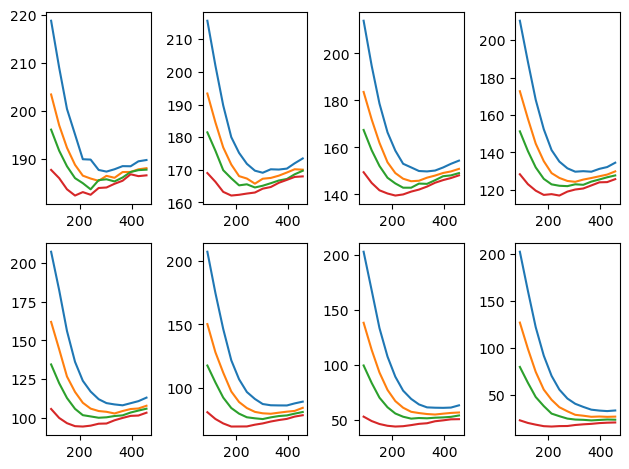

In [176]:
# Select rows where 'R0' is 16.0 
selected_rows = grouped_df[(grouped_df['R0'] == 16.0)]

# Plotting
fig, axs = plt.subplots(2, 4)

# Get unique values of 'MCV1' to plot separate lines
i = -1
for mcv1_value in [.2, .3, .4, .5, .6, .7, .8, .9]:
    subset1 = selected_rows[selected_rows['MCV1'] == mcv1_value].reset_index()
    i = i+1
    ax = axs[int(np.floor(i/4)), i%4]

    for MCV2 in [0.0, 0.5, 0.75, 1.0]:
        # Filter rows for each MCV1 value
        subset = subset1[subset1['MCV2'] == MCV2].reset_index()
    
        # Sort rows by 'MCV1_age' to get a proper line plot
        subset = subset.sort_values('MCV1_age')
    
        # Plot 'Infs' vs. 'MCV1_age' for the current MCV1 value
        ax.plot(subset['MCV1_age'], subset['Inf_mean_nrm'], label=f'MCV1 = {mcv1_value}')
#        yv = np.min(subset['Inf_mean_nrm'])
#        xv = np.argmin(subset['Inf_mean_nrm'])
#        ax.plot(subset['MCV1_age'][xv], yv, '.')
# Set the title and labels
#ax.set_title('Infs vs. MCV1_age for R0 = 16.0 and mat_duration = 120.0')
#ax.set_xlabel('MCV1_age')
#ax.set_ylabel('Infs')

# Show legend
#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
# Show plot
plt.show()

In [170]:
subset

,level_0,index,R0,MCV1,MCV1_age,mat_factor_inf,mat_factor_vx,mat_duration,MCV2,MCV2_age,Inf_mean_nrm
0,3,861,16.0,0.9,90.0,1.0,0.4,120.0,1.0,456.25,23.546732
1,7,865,16.0,0.9,121.0,1.0,0.4,120.0,1.0,456.25,20.766681
2,11,869,16.0,0.9,151.0,1.0,0.4,120.0,1.0,456.25,18.964502
3,15,873,16.0,0.9,182.0,1.0,0.4,120.0,1.0,456.25,17.364206
4,19,877,16.0,0.9,212.0,1.0,0.4,120.0,1.0,456.25,16.973266
5,23,881,16.0,0.9,242.0,1.0,0.4,120.0,1.0,456.25,17.438565
6,27,885,16.0,0.9,273.0,1.0,0.4,120.0,1.0,456.25,17.533891
7,31,889,16.0,0.9,303.0,1.0,0.4,120.0,1.0,456.25,18.608819
8,35,893,16.0,0.9,334.0,1.0,0.4,120.0,1.0,456.25,19.306408
9,39,897,16.0,0.9,365.0,1.0,0.4,120.0,1.0,456.25,19.812534


In [123]:
subset

,R0,MCV1,MCV1_age,mat_factor_inf,mat_factor_vx,mat_duration,MCV2,MCV2_age,Inf_mean_nrm
572,24.0,0.1,90.0,1.0,0.4,120.0,0.0,456.25,225.175024
573,24.0,0.1,121.0,1.0,0.4,120.0,0.0,456.25,221.052241
574,24.0,0.1,151.0,1.0,0.4,120.0,0.0,456.25,217.339901
575,24.0,0.1,182.0,1.0,0.4,120.0,0.0,456.25,214.101625
576,24.0,0.1,212.0,1.0,0.4,120.0,0.0,456.25,212.817146
577,24.0,0.1,242.0,1.0,0.4,120.0,0.0,456.25,211.887741
578,24.0,0.1,273.0,1.0,0.4,120.0,0.0,456.25,211.356069
579,24.0,0.1,303.0,1.0,0.4,120.0,0.0,456.25,211.652226
580,24.0,0.1,334.0,1.0,0.4,120.0,0.0,456.25,212.158204
581,24.0,0.1,365.0,1.0,0.4,120.0,0.0,456.25,212.668157
